In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt 


In [17]:
path = 'COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us'
all_files = glob.glob(path + "/*.csv")

In [18]:
a =all_files[0].split("/")[-1].replace(".csv", "")

In [19]:
a

'05-19-2020'

In [20]:
from datetime import datetime

In [21]:
datetimeobject = datetime.strptime(a,'%m-%d-%Y')

In [22]:
datetimeobject.strftime('%Y-%m-%d')

'2020-05-19'

In [23]:
data = []
prev = 0 
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    date = filename.split("/")[-1].replace(".csv", "")
    datetimeobject = datetime.strptime(date,'%m-%d-%Y')
    cur = df["Confirmed"].sum()
    tmp = [datetimeobject.strftime('%Y-%m-%d'), cur]
    data.append(tmp)

In [24]:
us_df = pd.DataFrame(data, columns = ['Date', 'Confirmed'])

In [25]:
us_df = us_df.set_index("Date").sort_index()

In [26]:
us_df["NewCases"] = us_df["Confirmed"] - us_df["Confirmed"] 

In [27]:
us_df["NewCases"] = us_df.Confirmed.diff()

In [28]:
us_df.to_csv("jhu-us.csv")

<AxesSubplot:xlabel='Date'>

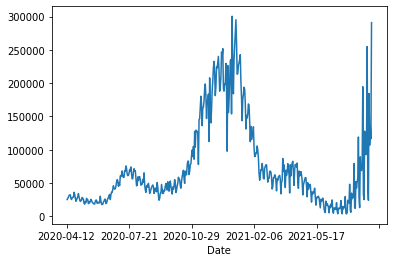

In [30]:
us_df["NewCases"].plot()